In [1]:
import numpy as np

from bqskit import Circuit, compile
from bqskit.ir.gates import CPGate, CSGate, CTGate, SwapGate
from bqskit.ext import bqskit_to_qiskit

import qiskit
from qiskit import QuantumCircuit, QuantumRegister

from qiskit.transpiler import CouplingMap, PassManager
from qiskit.transpiler.passes import BasicSwap

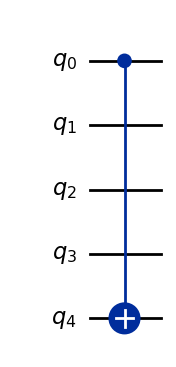

In [2]:
circ = QuantumCircuit(5)

circ.cx(0, 4)
# circ.swap(0, 4)
# circ.ccx(0, 2, 4)

circ.draw(output='mpl')

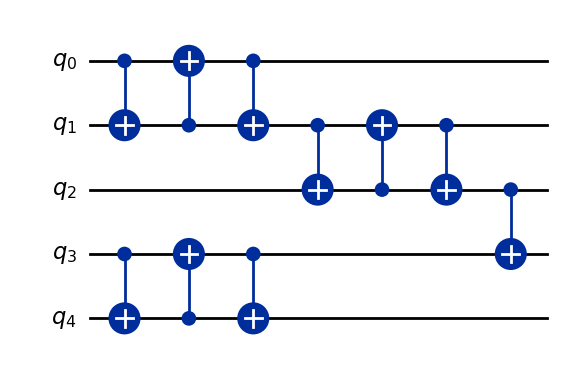

In [3]:
coupling_map = CouplingMap([[0,1], [1,2], [2,3], [3,4]])
# basic_swap_pass = BasicSwap(coupling_map)
# pm = PassManager(basic_swap_pass)
# tc = pm.run(tc)

tc = qiskit.transpile(circ, initial_layout=[0,1,2,3,4], coupling_map=coupling_map, optimization_level=3)
tc = tc.decompose()
tc.draw(output='mpl')